In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('dataset\Spatial-Clustering_ctr_mag4_5upper.csv')
df.head()

,time,latitude,longitude,mag,depth,cluster,final_cluster
0,9/24/1950 22:56,34.708,60.422,5.68,15.0,-1,57
1,9/25/1950 23:16,9.864,126.264,5.96,25.0,1212,59
2,9/26/1950 19:06,24.157,122.875,5.85,15.0,-1,22
3,9/27/1950 3:37,19.844,-109.076,5.74,25.0,444,44
4,9/28/1950 3:29,23.095,121.481,6.06,15.0,-1,22


In [10]:
final_centr = df.groupby('cluster')[['longitude', 'latitude']].mean().reset_index()

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

n_data = pd.read_csv('dataset\\all.csv')

# plt.figure(figsize=(16,8))
# plt.scatter(df['lon'], df['lat'])
# plt.show()

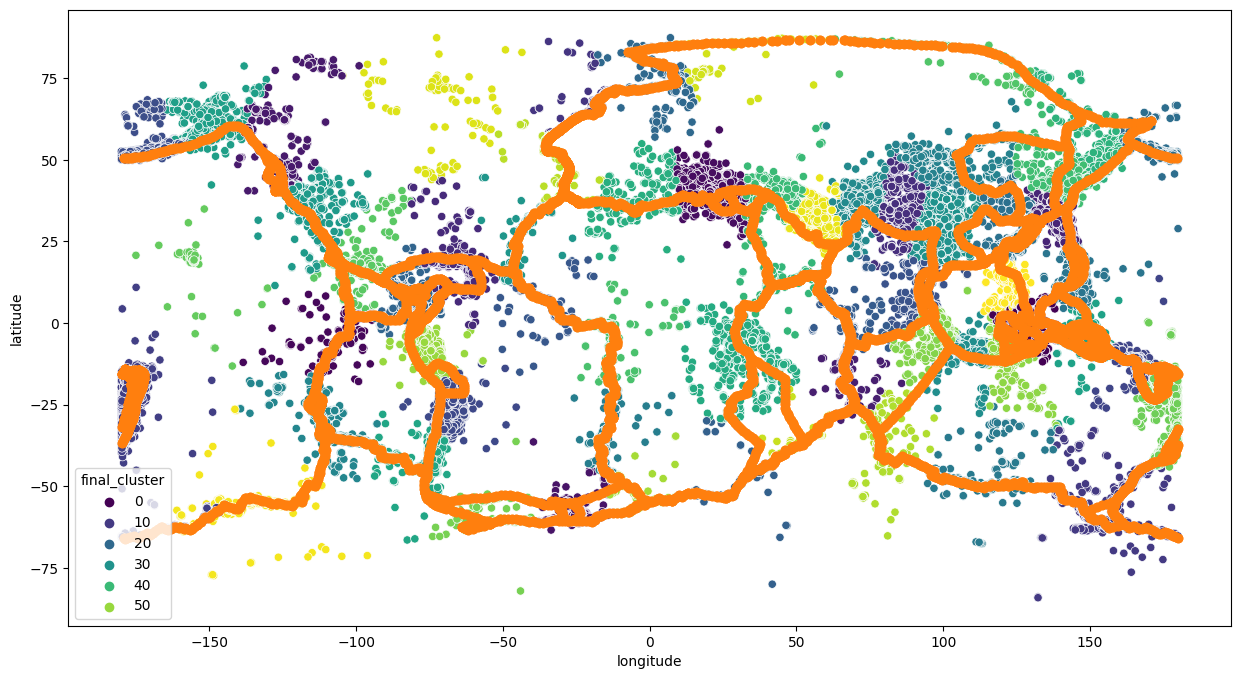

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['final_cluster'], palette='viridis')
# sns.scatterplot(x='longitude', y='latitude', data=final_centr, color='red', marker='X', s=20, label='Centroid')
plt.scatter(n_data['lon'], n_data['lat'])
plt.show()

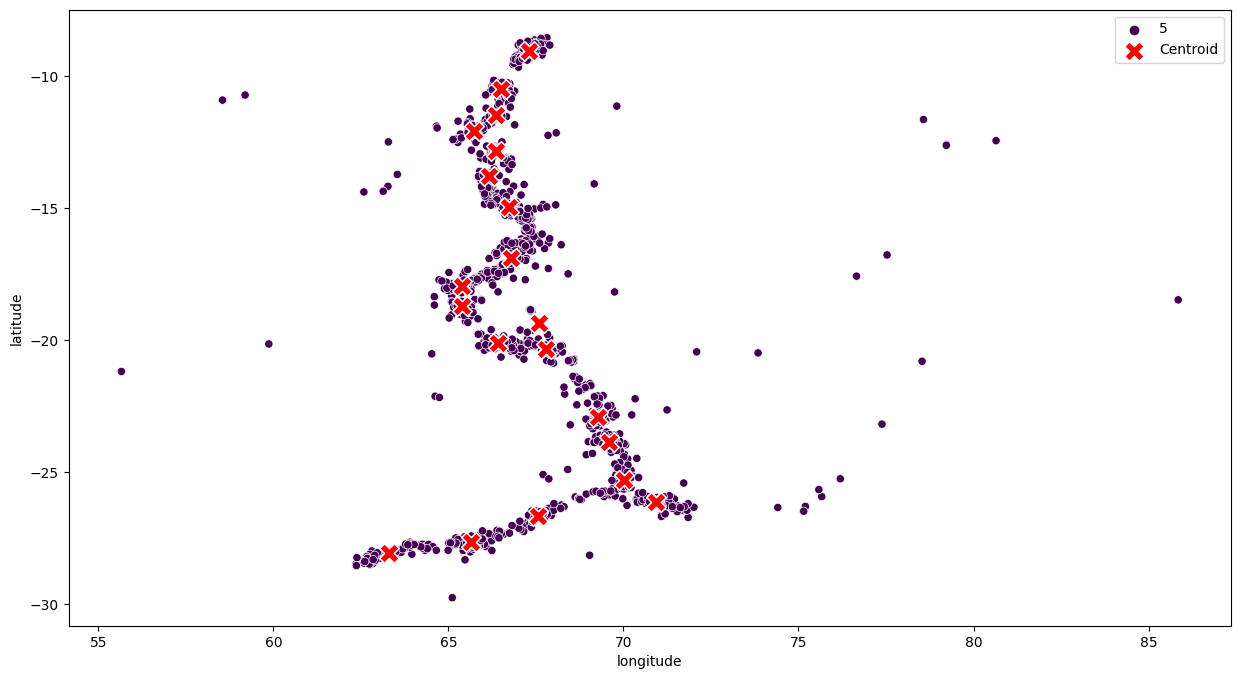

In [5]:
pt = df[df['final_cluster'] == 5]

final_center = pt.groupby('cluster')[['longitude', 'latitude']].mean().reset_index()

plt.figure(figsize=(15,8))
sns.scatterplot(x=pt['longitude'], y=pt['latitude'], hue=pt['final_cluster'], palette='viridis')
sns.scatterplot(x='longitude', y='latitude', data=final_center, color='red', marker='X', s=200, label='Centroid')
plt.show()

In [6]:
import pandas as pd
import geopandas as gpd
import folium
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')


df = pd.read_csv('dataset\Spatial-Clustering_ctr_mag4_5upper.csv')

x = df[['longitude', 'latitude', 'final_cluster']].sample(n=2000, random_state=1)

print(x)

sample_df = x

gdf = gpd.GeoDataFrame(sample_df, geometry=gpd.points_from_xy(sample_df.longitude, sample_df.latitude))

m = folium.Map(location=[sample_df['latitude'].mean(), sample_df['longitude'].mean()], zoom_start=100)

cluster_colors = [
    'blue', 'red', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige',
    'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue',
    'lightgreen', 'gray', 'black', 'lightgray', 'darkbrown'
]

for cluster in sample_df['final_cluster'].unique():
    cluster_data = sample_df[sample_df['final_cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f'Cluster: {row["final_cluster"]}',
            icon=folium.Icon(color=cluster_colors[cluster % len(cluster_colors)])
        ).add_to(m)
m.save('clusters_map.html')

        longitude  latitude  final_cluster
174807  -176.0070  -24.6650             11
273271   140.4242   35.3699              6
140847    92.8460   13.8470             15
155158    22.5950  -52.8800             18
116007   129.1930   -7.2060              0
...           ...       ...            ...
71568    149.3240   -5.6100             34
67155     94.3950   20.3200             30
64162    -73.4170  -15.0490             50
6940    -177.5060  -22.3560             11
57681    -25.0660  -58.6140              3

[2000 rows x 3 columns]
